In [135]:
import numpy as np
import matplotlib.pyplot as plt
import time, os, sys, gc

import h5py 

import svgutils.transform as sg 
import sys 

import matplotlib.patches as patches

from scipy.integrate import solve_ivp

import class_energy as energy
import class_equations_of_motion as eom 

import class_handle_input as h_in
import class_handle_wavefunctions as h_wavef

import class_visualization as vis
import class_mass_size as mass_size

In [136]:
def get_E_arr(Mx_list, My_list, folder, check_sys):
    h5_io_object = h_in.io_hdf5()
    
    E_s_arr = np.zeros(len(Mx_list), dtype=complex)
    for i in range(len(Mx_list)):
        Mx = Mx_list[i]
        My = My_list[i]

        check_sym = 'Mx_'+str(Mx)+'_My_'+str(My)+'.'
        file_list = [f for f in os.listdir(folder) if check_sys in f and check_sym in f]

        if len(file_list) > 1: 
            break
        for file in file_list:
            file_name = folder+file
            psi, params = h5_io_object.get_psi(file_name)

            energy_object = energy.energy(params=params)
            E, E_T, E_B, E_V = energy_object.calc_energy(psi)
            E_s_arr[i] = E
    return E_s_arr

In [3]:
def plot_rotor_wavefunction(x, chosen_My, chosen_Mx, psi):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    ##plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 18 

    fig, axs = plt.subplots(chosen_My,chosen_Mx, subplot_kw=dict(polar=True))
    #plt.suptitle(r'$V_0 =$'+str(V_0), fontsize=font_size)

    for i in range(chosen_My):
         for j in range(chosen_Mx):
            #axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_My/2))%chosen_My], color='lightcoral')

            axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_Mx/2))%chosen_Mx], color='lightcoral')


            axs[i, j].set_yticklabels([])
            axs[i, j].set_xticklabels([])
            axs[i, j].set_theta_zero_location('E')

            axs[i, j].grid(linewidth=0.5)
            axs[i, j].spines['polar'].set_linewidth(0.3) #.set_visible(False)

    #axs[0, 0].set_theta_zero_location('E')
    #lines, labels = axs[0, 0].set_thetagrids((0, 45, 90, 135, 180), (r'0', ' ', r'$\pi/2$', ' ', r'$\pi$'))

In [4]:
params = {"n": 256,
"M": 36,
"Mx": 6,
"Mx_display": 4,
"converge_new_lattice": "no",
"My": 6,
"My_display": 4,
"B": 1.0,
"tx": 100,
"ty": 100,
"V_0": 150.0,
"qx": 0,
"qy": 0,
"init_choice": "uniform",
"external_wf_tag": " ",
"excitation_no": 11,
"angle_pattern": [0,0,0,0],
"V_0_pattern": [0,0,0,0],
"n_states": 0,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-7}

x = (2*np.pi/params["n"])*np.arange(params["n"])

''' 
I/O Objects
'''
h5_io_object = h_in.io_hdf5()

check_sys = 'tx_'+str(params["tx"])+'_ty_'+str(params["ty"])+'_V0_'+str(params["V_0"])

[0.05032844-6.48212508e-20j 0.01145677-4.09575662e-20j
 0.0017026 +9.41948463e-22j 0.00010094+2.19371299e-21j
 0.        +0.00000000e+00j]


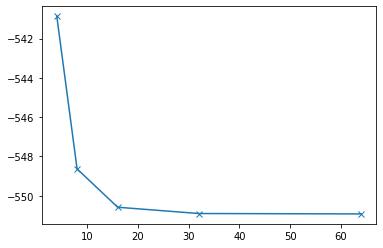

In [5]:
Mx_list_fo = 2**(np.arange(2,7))
My_list_fo = 2**(np.arange(2,7))

folder = 'results/numerics_verification/fo/'

E_size_fo_arr = get_E_arr(Mx_list_fo, My_list_fo, folder, check_sys)
print((E_size_fo_arr-E_size_fo_arr[-1])/200)
plt.plot(Mx_list_fo, E_size_fo_arr.real, marker='x')

[-601.45018058+9.98597421e-17j -595.82906873+1.43669417e-17j
 -587.52007157+5.49719147e-17j -581.44686197+2.78473012e-17j
 -580.3744361 +2.29190220e-17j -580.35152471+7.88355026e-18j
 -580.35103204-8.11067743e-18j]


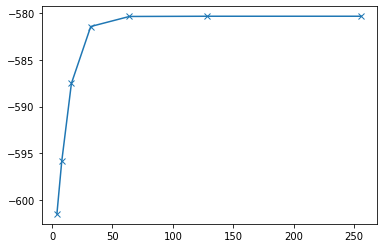

In [6]:
My_list_fdv = 2**(np.arange(2,9))
Mx_list_fdv = 4*np.ones(len(My_list_fdv), dtype=int)

folder = 'results/numerics_verification/fdv/'

E_size_fdv_arr = get_E_arr(Mx_list_fdv, My_list_fdv, folder, check_sys)
print(E_size_fdv_arr)
plt.plot(My_list_fdv, E_size_fdv_arr.real, marker='x')

[-601.45018058+2.61617752e-17j -595.82906873+1.15089378e-16j
 -587.52007157+3.08975865e-17j -581.44686197+7.15354504e-17j
 -580.3744361 +2.24858806e-17j -580.35152471-2.97328043e-17j
 -580.35103204-3.95387349e-17j]


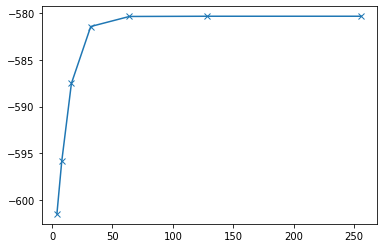

In [7]:
Mx_list_fdh = 2**(np.arange(2,9)) 
My_list_fdh = 4*np.ones(len(Mx_list_fdh), dtype=int)

folder = 'results/numerics_verification/fdh/'

E_size_fdh_arr = get_E_arr(Mx_list_fdh, My_list_fdh, folder, check_sys)
print(E_size_fdh_arr)
plt.plot(Mx_list_fdh, E_size_fdh_arr.real, marker='x')

[-565.61131705-2.13102502e-17j -565.61131705+1.00793601e-16j
 -565.61131705+2.40229373e-16j -565.61131705-4.71780608e-17j
 -565.61131705-2.78013085e-17j]
[-565.61131705-2.13102502e-17j -565.61131705+1.00793601e-16j
 -565.61131705+2.40229373e-16j -565.61131705-4.71780608e-17j
 -565.61131705-2.78013085e-17j]


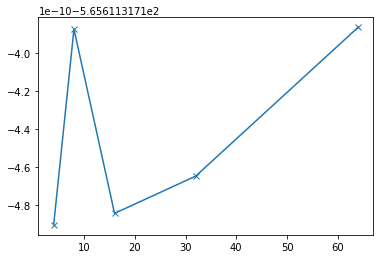

In [8]:
Mx_list_sp = 2**(np.arange(2,7))
My_list_sp = 2**(np.arange(2,7))

folder = 'results/numerics_verification/sp/'

E_size_sp_arr = get_E_arr(Mx_list_sp, My_list_sp, folder, check_sys)
print(E_size_sp_arr)
plt.plot(Mx_list_sp, E_size_sp_arr.real, marker='x')
print(E_size_sp_arr)

In [9]:
def E_to_plot(E,E_0):
    return np.abs(E-E_0)/np.abs(E_0)

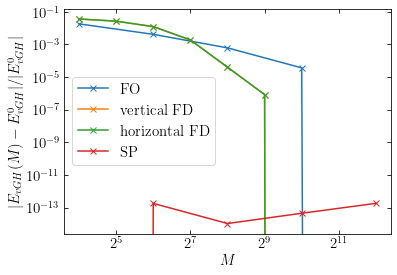

In [10]:
E_0_fo = np.min(E_size_fo_arr)
E_0_fdv = np.max(E_size_fdv_arr)
E_0_fdh = np.max(E_size_fdh_arr)
E_0_sp = np.min(E_size_sp_arr)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font_size = 15

fig, axs = plt.subplots()

axs.plot(Mx_list_fo**2, E_to_plot(E_size_fo_arr, E_0_fo), marker='x', label=r'FO')
axs.plot(My_list_fdv*Mx_list_fdv, E_to_plot(E_size_fdv_arr, E_0_fdv), marker='x', label=r'vertical FD')
axs.plot(Mx_list_fdh*My_list_fdh, E_to_plot(E_size_fdh_arr, E_0_fdh), marker='x', label=r'horizontal FD')
axs.plot(Mx_list_sp**2, E_to_plot(E_size_sp_arr, E_0_sp), marker='x', label=r'SP')


axs.set_xlabel(r'$M$', fontsize=font_size)
axs.set_ylabel(r'$|E_{vGH}(M) - E_{vGH}^0|/|E_{vGH}^0|$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

axs.set_xscale('log', base=2)
axs.set_yscale('log')

plt.legend(fontsize=15)

plt.tick_params(axis='x', direction='in', length=4, top=True)
plt.tick_params(axis='y', direction='in', length=4, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)

In [11]:
params["tx"] = 95
params["ty"] = 105

params["Mx"] = 4
params["My"] = 20

params["V_0"] = 150

params["tol"] = 1e-7

params["init_choice"] = "ferro_domain_vertical_wall"
psi_fo, E_evo_fo, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

print(E_evo_fo[-1])

NameError: name 'solve_imag_time_prop' is not defined

In [ ]:
params["init_choice"] = "ferro_domain_vertical_wall"
psi_fdv, E_evo_fdv, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

params["init_choice"] = "ferro_domain_horizontal_wall"
psi_fdh, E_evo_fdh, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

params["init_choice"] = "small_polaron"
psi_sp, E_evo_sp, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

max_psi = np.max(np.array([np.abs(psi_fo)**2,np.abs(psi_fdv)**2,np.abs(psi_fdh)**2,np.abs(psi_sp)**2])).real

## Convergence for eff mass situations

This analysis investigates how the effective mass converges with the lattice size.

In [178]:
def get_E_arr_eff_mass(Mx_list, My_list, folder, check_sys, check_sym_in):
    h5_io_object = h_in.io_hdf5()
    
    E_s_arr = np.zeros(len(Mx_list), dtype=complex)
    for i in range(len(Mx_list)):
        Mx = Mx_list[i]
        My = My_list[i]

        check_sym = 'Mx_'+str(Mx)+'_My_'+str(My)+check_sym_in
        file_list = [f for f in os.listdir(folder) if check_sys in f and check_sym in f]

        if len(file_list) > 1: 
            break
        for file in file_list:
            file_name = folder+file
            psi, params = h5_io_object.get_psi(file_name)

            energy_object = energy.energy(params=params)
            E, E_T, E_B, E_V = energy_object.calc_energy(psi)
            E_s_arr[i] = E
    return E_s_arr

def var_eff_mass(E_q, E_0, t, M):
    m_0_finite_diff = (t*M**2*(1-np.cos(2*np.pi/M))/np.pi**2)**(-1)
    return ((2*(E_q-E_0)/(2*np.pi/M)**2)**(-1))/m_0_finite_diff

### Effective Mass Convergence for Ferro-Order
First we plot how the energy at $q_x,q_y=0$ and $q_x,q_y=1$ depend on the lattice size

q = 0:
My = [ 16  24  32  48  64  80  90 128]
E = [-400.02513471+2.48629085e-21j -400.02517178-1.03743767e-21j
 -400.02517307+4.92730498e-22j -400.02517309+4.15268179e-21j
 -400.02517309+9.13467408e-22j -400.02517309-3.97562894e-22j
 -400.02517309-1.41612240e-21j -400.02517309+9.64753850e-22j]


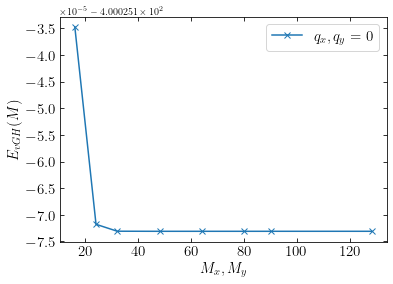

q = 1:
My = [ 16  24  32  48  64  80  90 128]
E = [-388.25483059+2.76554028e-14j -394.48954933-8.38985035e-15j
 -396.725287  +4.30380827e-14j -398.31468896+1.38783238e-14j
 -399.06239951+1.66532950e-14j -399.40881484-1.38781810e-14j
 -399.53812011-1.52659238e-14j -399.78433113-3.46941003e-15j]


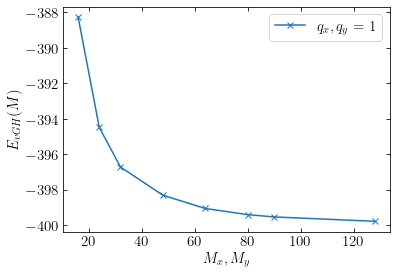

In [226]:
My_list_fo = np.array([16,24,32,48,64,80,90,128]) #2**(np.arange(2,7))
Mx_list_fo = np.array([16,24,32,48,64,80,90,128]) #2**(np.arange(2,7)) #4*np.ones(len(My_list_fdv), dtype=int)

t = 200

folder = 'results/numerics_verification/fo/'

check_sys = 'tx_100_ty_100_V0_2.0_B_1.0' #'tx_100_ty_100_V0_150.0_B_1.0'
check_sym = '_qx_0_qy_0'

E_size_q0_fo_arr = get_E_arr_eff_mass(Mx_list_fo, My_list_fo, folder, check_sys, check_sym)

print('q = 0:')
print('My =', My_list_fo)
print('E =', E_size_q0_fo_arr)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font_size = 15

fig, axs = plt.subplots()

plt.plot(My_list_fo, E_size_q0_fo_arr.real, marker='x', label=r'$q_x,q_y=0$')

axs.set_xlabel(r'$M_x,M_y$', fontsize=font_size)
axs.set_ylabel(r'$E_{vGH}(M)$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

#axs.set_xscale('log', base=2)
#axs.set_yscale('log')

plt.legend(fontsize=15)

plt.tick_params(axis='x', direction='in', length=4, top=True)
plt.tick_params(axis='y', direction='in', length=4, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)
plt.show()



check_sys = 'tx_100_ty_100_V0_2.0_B_1.0'
check_sym = '_qx_1_qy_0'

E_size_qx_fo_arr = get_E_arr_eff_mass(Mx_list_fo, My_list_fo, folder, check_sys, check_sym)

print('q = 1:')
print('My =', My_list_fo)
print('E =', E_size_qx_fo_arr)

fig, axs = plt.subplots()

plt.plot(My_list_fo, E_size_qx_fo_arr.real, marker='x', label=r'$q_x,q_y=1$')

axs.set_xlabel(r'$M_x,M_y$', fontsize=font_size)
axs.set_ylabel(r'$E_{vGH}(M)$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

#axs.set_xscale('log', base=2)
#axs.set_yscale('log')

plt.legend(fontsize=15)

plt.tick_params(axis='x', direction='in', length=4, top=True)
plt.tick_params(axis='y', direction='in', length=4, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)
plt.show()


#check_sys = 'tx_100_ty_100_V0_150.0'
#check_sym = '_qx_0_qy_1'

#E_size_qy_fo_arr = get_E_arr_eff_mass(Mx_list_fo, My_list_fo, folder, check_sys, check_sym)
#print(E_size_qy_fdv_arr)
#plt.plot(My_list_fo, E_size_qy_fo_arr.real, marker='x')
#plt.xscale('log', base=10)
#plt.yscale('log')

Here we analyze the dependence of the eff. mass on lattice size

diff qy:  [11.77030412+2.76554003e-14j  5.53562245-8.38984932e-15j
  3.29988607+4.30380822e-14j  1.71048413+1.38783197e-14j
  0.96277358+1.66532941e-14j  0.61635825-1.38781806e-14j
  0.48705298-1.52659224e-14j  0.24084196-3.46941099e-15j]
eff_mass:  [2.58686494 2.46217469 2.32913733 2.0006356  2.0005839  2.00056785
 2.00056242 2.00055474]


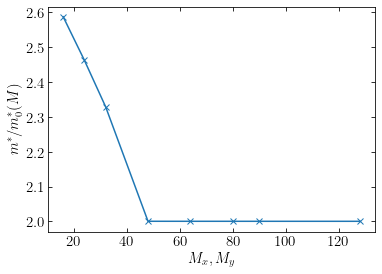

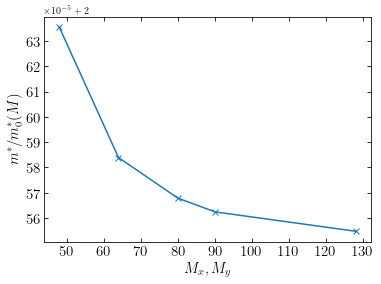

In [275]:
eff_mass = var_eff_mass(E_size_qx_fo_arr, E_size_q0_fo_arr, t, My_list_fo).real

print('diff qy: ', (E_size_qx_fo_arr-E_size_q0_fo_arr)) 
print('eff_mass: ', eff_mass)

fig, axs = plt.subplots()

plt.plot(My_list_fo, eff_mass, marker='x', label=r'')

axs.set_xlabel(r'$M_x,M_y$', fontsize=font_size)
axs.set_ylabel(r'$m^*/m_0^*(M)$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

#axs.set_xscale('log', base=2)
#axs.set_yscale('log')

#plt.legend(fontsize=15)

plt.tick_params(axis='x', direction='in', length=4, top=True)
plt.tick_params(axis='y', direction='in', length=4, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)
plt.show()



fig, axs = plt.subplots()

plt.plot(My_list_fo[3:], eff_mass[3:], marker='x', label=r'')

axs.set_xlabel(r'$M_x,M_y$', fontsize=font_size)
axs.set_ylabel(r'$m^*/m_0^*(M)$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

#plt.xscale('log', base=2)
#plt.yscale('log')

#plt.legend(fontsize=15)

plt.tick_params(axis='x', direction='in', length=4, top=True)
plt.tick_params(axis='y', direction='in', length=4, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)
plt.show()

The data of the last figure can be fitted to extract the mass in the thermodynamic limit.

Fit params = [2.00055534e+00 7.61355102e-04 1.62900120e+01]
diff to last size = 5.986380404721103e-07


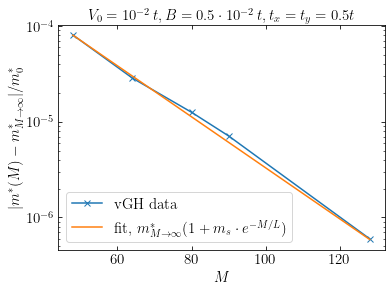

In [283]:
import scipy 

x_e = My_list_fo[3:] #np.array([32,48,64,80])
y_e = eff_mass[3:] #np.array([171.1863618, 199.65113496, 199.78108752, 199.84047259]) #np.array([32.1376832, 33.59607878, 34.7793058])

#16,24,
# 152.65038656, 161.53223574, 
a, b = np.polyfit(x_e, y_e, 1)

x = np.linspace(48,128,100)
y = a*x+b

def func(x, m_inf, m_0, a):
    return m_inf*(1+m_0*np.exp(-x/a))
    
popt, pcov = scipy.optimize.curve_fit(func, x_e, y_e, p0 = [2, 1e-5, 16]) #bounds=([30,0,-10], [50, 100, 0]))
print('Fit params =', popt)
print('diff to last size =', popt[0]-eff_mass[-1])

m_inf = popt[0]

y = func(x, *popt)

fig, axs = plt.subplots()

plt.title(r'$V_0=10^{-2}\,t, B=0.5\cdot 10^{-2}\,t, t_x=t_y=0.5t$', fontsize=15)

plt.plot(x_e,np.abs(y_e-m_inf), marker='x', label=r'vGH data')
plt.plot(x,np.abs(y-m_inf), label=r'fit, $m^*_{M\rightarrow \infty}(1+m_s\cdot e^{-M/L})$')

axs.set_xlabel(r'$M$', fontsize=font_size)
axs.set_ylabel(r'$|m^*(M)-m^*_{M\rightarrow \infty}|/m_0^*$', fontsize=font_size)

#axs.set_xscale('log', base=2)
axs.set_yscale('log')

plt.legend(fontsize=15, loc=3)

plt.tick_params(axis='x', direction='in', length=4, top=True, labelsize=font_size)
plt.tick_params(axis='y', direction='in', length=4, right=True, labelsize=font_size)

plt.tick_params(which='minor', axis='x', direction='in', top=True)
plt.tick_params(which='minor', axis='y', direction='in', right=True)
plt.savefig('results/numerics_verification/fo_eff_mass_convergence_V0_2_B_1_t_200_sym.svg')
plt.show()

### Effective Mass Convergence for Ferro-Domains

[-601.45018058+9.98597421e-17j -595.82906873+1.43669417e-17j
 -587.52007157+5.49719147e-17j -581.44686197+2.78473012e-17j
 -580.3744361 +2.29190220e-17j -580.35152471+7.88355026e-18j]


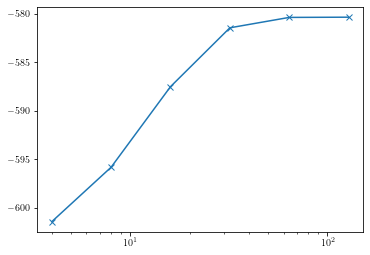

[-601.45018058+4.22817636e-17j -595.82906873+3.75299970e-17j
 -587.52007157+8.12529325e-17j -581.44686197+3.63055376e-17j
 -580.37443609-2.63451714e-17j -580.3515247 -2.14829102e-17j]


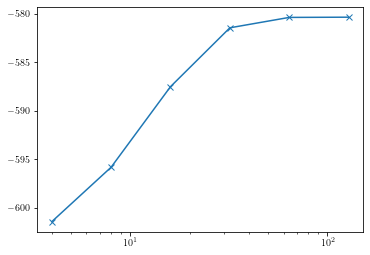

[-565.6110776 -9.43010116e-17j -578.30356138-2.54293309e-15j
 -584.6049759 +8.25408344e-15j -581.20519811+4.71787512e-13j
 -580.34103495+4.56638884e-13j -580.34348668+4.33047778e-13j]


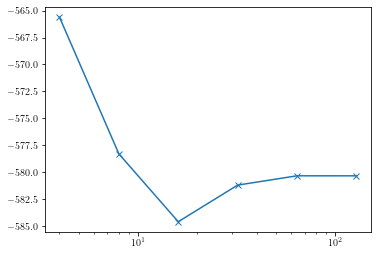

In [240]:
My_list_fdv = 2**(np.arange(2,8))
Mx_list_fdv = 4*np.ones(len(My_list_fdv), dtype=int)

folder = 'results/numerics_verification/fdv/'

Mx_list_fdv = 4*np.ones(len(My_list_fdv), dtype=int)

check_sys = 'tx_100_ty_100_V0_150.0_B_1.0'
check_sym = '.'

E_size_q0_fdv_arr = get_E_arr_eff_mass(Mx_list_fdv, My_list_fdv, folder, check_sys, check_sym)
print(E_size_q0_fdv_arr)
plt.plot(My_list_fdv, E_size_q0_fdv_arr.real, marker='x')
plt.xscale('log', base=10)
plt.show()


Mx_list_fdv = 32*np.ones(len(My_list_fdv), dtype=int)

check_sys = 'tx_100_ty_100_V0_150.0'
check_sym = '_qx_1_qy_0'

E_size_qx_fdv_arr = get_E_arr_eff_mass(Mx_list_fdv, My_list_fdv, folder, check_sys, check_sym)
print(E_size_qx_fdv_arr)
plt.plot(My_list_fdv, E_size_qx_fdv_arr.real, marker='x')
plt.xscale('log', base=10)
plt.show()



check_sys = 'tx_100_ty_100_V0_150.0'
check_sym = '_qx_0_qy_1'

E_size_qy_fdv_arr = get_E_arr_eff_mass(Mx_list_fdv, My_list_fdv, folder, check_sys, check_sym)
print(E_size_qy_fdv_arr)
plt.plot(My_list_fdv, E_size_qy_fdv_arr.real, marker='x')
plt.xscale('log', base=10)
#plt.yscale('log')

eff_mass x:  [1.33872840e+11 1.73570692e+10 1.84412942e+10 8.79138939e+09
 2.17528828e+09 2.18541407e+09]
eff_mass y:  [11.16099363  6.6849584  10.44500439 31.80404407 57.6659594  59.9422258 ]


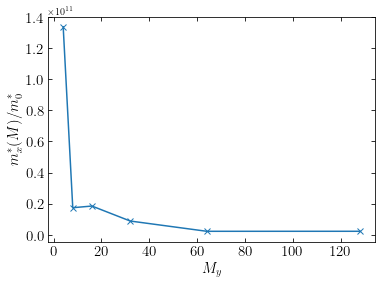

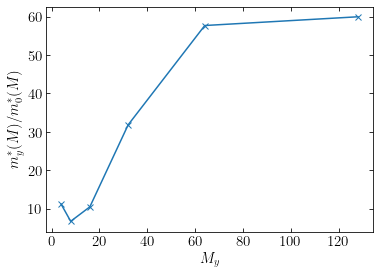

In [258]:
eff_mass_fdv_x = var_eff_mass(E_size_qx_fdv_arr, E_size_q0_fdv_arr, t, Mx_list_fdv).real
eff_mass_fdv_y = var_eff_mass(E_size_qy_fdv_arr, E_size_q0_fdv_arr, t, My_list_fdv).real
 
print('eff_mass x: ', eff_mass_fdv_x)
print('eff_mass y: ', eff_mass_fdv_y)

fig, axs = plt.subplots()

plt.plot(My_list_fdv, eff_mass_fdv_x, marker='x', label=r'')

axs.set_xlabel(r'$M_y$', fontsize=font_size)
axs.set_ylabel(r'$m_x^*(M)/m_0^*$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.tick_params(axis='x', direction='in', length=4, top=True)
plt.tick_params(axis='y', direction='in', length=4, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)
plt.show()



fig, axs = plt.subplots()

plt.plot(My_list_fdv, eff_mass_fdv_y, marker='x', label=r'')

axs.set_xlabel(r'$M_y$', fontsize=font_size)
axs.set_ylabel(r'$m_y^*(M)/m_0^*(M)$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.tick_params(axis='x', direction='in', length=4, top=True)
plt.tick_params(axis='y', direction='in', length=4, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)
plt.show()

Fit params = [62.19614926 -1.59685478 25.18390741]
diff to last size = 2.2539234546360802


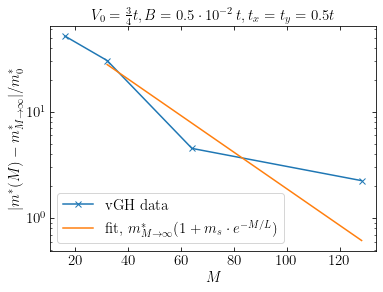

In [285]:
import scipy 

x_e = My_list_fdv[2:] #np.array([32,48,64,80])
y_e = eff_mass_fdv_y[2:] #np.array([171.1863618, 199.65113496, 199.78108752, 199.84047259]) #np.array([32.1376832, 33.59607878, 34.7793058])

#16,24,
# 152.65038656, 161.53223574, 
a, b = np.polyfit(x_e, y_e, 1)

x = np.linspace(32,128,100)
y = a*x+b

def func(x, m_inf, m_0, a):
    return m_inf*(1+m_0*np.exp(-x/a))
    
popt, pcov = scipy.optimize.curve_fit(func, x_e, y_e, p0 = [62, -1.5, 16]) 
print('Fit params =', popt)
print('diff to last size =', popt[0]-eff_mass_fdv_y[-1])

m_inf = popt[0]

y = func(x, *popt)

fig, axs = plt.subplots()

plt.title(r'$V_0=\frac{3}{4}t, B=0.5\cdot 10^{-2}\,t, t_x=t_y=0.5t$', fontsize=15)

plt.plot(x_e,np.abs(y_e-m_inf), marker='x', label=r'vGH data')
plt.plot(x,np.abs(y-m_inf), label=r'fit, $m^*_{M\rightarrow \infty}(1+m_s\cdot e^{-M/L})$')

axs.set_xlabel(r'$M$', fontsize=font_size)
axs.set_ylabel(r'$|m^*(M)-m^*_{M\rightarrow \infty}|/m_0^*$', fontsize=font_size)

#axs.set_xscale('log', base=2)
axs.set_yscale('log')

plt.legend(fontsize=15, loc=3)

plt.tick_params(axis='x', direction='in', length=4, top=True, labelsize=font_size)
plt.tick_params(axis='y', direction='in', length=4, right=True, labelsize=font_size)

plt.tick_params(which='minor', axis='x', direction='in', top=True)
plt.tick_params(which='minor', axis='y', direction='in', right=True)
plt.savefig('results/numerics_verification/fdv_eff_mass_convergence_V0_150_B_1_t_200_sym.svg')
plt.show()